# Flatiron Project 1 - Seattle Housing Data

The following analysis created in 2019 January, for the Flatiron School Project1. 

Our Jupyter Notebook is structured as follows:

- __Section 1, Data Cleaning__: In this section, we take the original database, kc_house_data.csv, and clean up the missing values, duplicates, erroneous data inputs, and outliers. Our analysis process is shown in details, so even if we do not adjust certain values, we show our thought process.
- __Section 2, Data Exploration__: We ask and answer exploratory questions regarding the data. At this point, we are using the data we have already cleaned up in Section 1. 
- __Section 3, Linear Regression__: In the last section, we fit a linear regression model and try to find the best model to describe the variance in the price of the houses. 

## Section 1 - Data Cleaning

In [357]:
# importing librarires to be used in sections 1-2
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [358]:
# importing data
data = pd.read_csv('kc_house_data.csv')

In [359]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


The data consists of 21,597 rows. 
There are missing values in at least three columns (waterfront, view, yr_renovated), this does not imply that the rest are correct. 
  
In the following, we are going through the columns one by one, and decide how to process. We are going in a different order, for example we are grouping the sqft variables, etc.


### 'id'

In [445]:
data[data['id'].duplicated(keep = False)].sort_values(by = 'id', ascending = True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,0.0,3,7,2400,0.0,1991,98002,47.3262,-122.214,2060,7316
2494,1000102,2014-09-16,280000.0,6,3.00,2400,9373,2.0,0.0,3,7,2400,0.0,1991,98002,47.3262,-122.214,2060,7316
16800,7200179,2014-10-16,150000.0,2,1.00,840,12750,1.0,0.0,3,6,840,0.0,1925,98055,47.4840,-122.211,1480,6969
16801,7200179,2015-04-24,175000.0,2,1.00,840,12750,1.0,0.0,3,6,840,0.0,1925,98055,47.4840,-122.211,1480,6969
11422,109200390,2014-10-20,250000.0,3,1.75,1480,3900,1.0,0.0,4,7,1480,0.0,1980,98023,47.2977,-122.367,1830,6956
11421,109200390,2014-08-20,245000.0,3,1.75,1480,3900,1.0,0.0,4,7,1480,0.0,1980,98023,47.2977,-122.367,1830,6956
12406,123039336,2014-12-08,244900.0,1,1.00,620,8261,1.0,0.0,3,5,620,0.0,1939,98106,47.5138,-122.364,1180,8244
12405,123039336,2014-06-11,148000.0,1,1.00,620,8261,1.0,0.0,3,5,620,0.0,1939,98106,47.5138,-122.364,1180,8244
7786,251300110,2015-01-14,358000.0,3,2.25,2510,12013,2.0,0.0,3,8,2510,0.0,1988,98003,47.3473,-122.314,1870,8017
7785,251300110,2014-07-31,225000.0,3,2.25,2510,12013,2.0,0.0,3,8,2510,0.0,1988,98003,47.3473,-122.314,1870,8017


There are 353 rows that contain properties that are in the database multiple times. I think we can just leave these rows in, I don't think it distorts the data, if it was sold multiple times. 

### 'date'

In [360]:
data['date'].value_counts().head()

6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
Name: date, dtype: int64

In [361]:
data['date'].value_counts().tail()

11/30/2014    1
11/2/2014     1
5/17/2014     1
2/15/2015     1
5/15/2015     1
Name: date, dtype: int64

In [362]:
type(data['date'][0])

str

In [363]:
# the date fields are entered as strings, convert to datetime

data['date'] = pd.to_datetime(data['date'], format = '%m/%d/%Y')

In [364]:
print(data['date'].max(), data['date'].min())

2015-05-27 00:00:00 2014-05-02 00:00:00


Fields in column 'date' are proper date values, all from 2014 - 2015.

### 'lat', 'long', and 'zipcode'

In [365]:
data[['lat', 'long', 'zipcode']].describe()

,lat,long,zipcode
count,21597.000000,21597.000000,21597.000000
mean,47.560093,-122.213982,98077.951845
std,0.138552,0.140724,53.513072
min,47.155900,-122.519000,98001.000000
25%,47.471100,-122.328000,98033.000000
50%,47.571800,-122.231000,98065.000000
75%,47.678000,-122.125000,98118.000000
max,47.777600,-121.315000,98199.000000


'lat', 'long', and 'zipcode' variables do not look incorrect as far as we can tell. They are all close to Seattle as indicated in the data summary. Zipcodes starting with 980 are in Seattle Vicinity, the ones starting with 981 are in Seattle Main. 

It is doubtful we can use them in a linear regression model in their current form, but they do not show obvious incorrectness. 

### 'waterfront'

In [366]:
data['waterfront'].value_counts(dropna = False)

 0.0    19075
NaN      2376
 1.0      146
Name: waterfront, dtype: int64

In [367]:
(data[data['waterfront'] == 1]['price']/1000).describe()

count     146.000000
mean     1717.214726
std      1145.384857
min       285.000000
25%       827.500000
50%      1510.000000
75%      2282.500000
max      7060.000000
Name: price, dtype: float64

In [368]:
(data['price']/1000).describe()

count    21597.000000
mean       540.296574
std        367.368140
min         78.000000
25%        322.000000
50%        450.000000
75%        645.000000
max       7700.000000
Name: price, dtype: float64

The distributions of the waterfront vs non-waterfront houses' prices are somewhat different, but the ratio of waterfront houses in the data is so low that we do not think it can be reliably used in a regression model. 

Possible treatment would be to keep the column and either

- delete the rows where we have missing values;
- populate missing values with 0;
- estimate waterfront value based on available lattitude and longitude data.

Ultimately, for our linear regression analysis, we can't use the column. 

In [369]:
data.drop(labels = 'waterfront', axis = 1, inplace = True);

### 'view'

In [370]:
data['view'].value_counts(dropna = False)

 0.0    19422
 2.0      957
 3.0      508
 1.0      330
 4.0      317
NaN        63
Name: view, dtype: int64

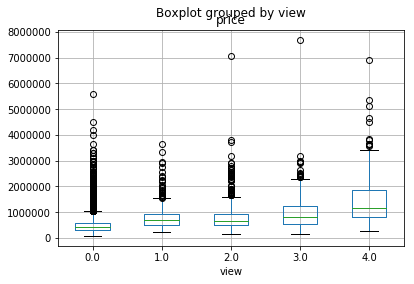

In [371]:
data.boxplot(column = 'price', by = 'view')

In [372]:
data.groupby(['view'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
view,,,,,,,,
0.0,19422.0,4.968061e+05,287419.959567,78000.0,311525.0,432500.0,600000.0,5570000.0
1.0,330.0,8.133733e+05,512776.626107,217000.0,498250.0,691944.0,923750.0,3650000.0
2.0,957.0,7.913904e+05,510385.693444,169317.0,485000.0,675000.0,938000.0,7060000.0
3.0,508.0,9.732852e+05,613898.399842,154000.0,558000.0,802500.0,1260000.0,7700000.0
4.0,317.0,1.452466e+06,930747.701932,252000.0,815000.0,1180000.0,1850000.0,6890000.0


In [373]:
data[data['view'].isnull()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
114,8961960160,2014-10-28,480000.0,4,2.50,3230,16171,2.0,NaN,3,9,2520,710.0,2001,0.0,98001,47.3183,-122.253,2640,8517
129,7853210060,2015-04-06,430000.0,4,2.50,2070,4310,2.0,NaN,3,7,2070,0.0,2004,0.0,98065,47.5319,-121.850,1970,3748
205,3456000310,2014-08-04,840000.0,4,1.75,2480,11010,1.0,NaN,4,9,1630,850.0,1966,NaN,98040,47.5378,-122.219,2770,10744
487,1895000260,2014-07-21,207950.0,2,2.00,890,5000,1.0,NaN,3,6,890,0.0,1917,0.0,98118,47.5158,-122.264,1860,5000
590,2525069041,2014-09-04,505000.0,3,1.50,1830,217800,1.0,NaN,3,7,1010,820.0,1981,0.0,98053,47.6277,-121.972,2450,165963
938,1324079046,2015-01-20,350000.0,3,2.25,1580,47916,1.0,NaN,3,7,1580,0.0,1979,0.0,98024,47.5583,-121.852,1980,75358
1313,7558700030,2015-04-13,5300000.0,6,6.00,7390,24829,2.0,NaN,4,12,5000,2390.0,1991,0.0,98040,47.5631,-122.210,4320,24619
1364,9468200140,2014-08-19,450000.0,2,1.75,1250,2890,1.0,NaN,4,7,790,460.0,1920,0.0,98103,47.6795,-122.353,1500,3225
1701,3121069036,2014-12-08,617000.0,3,1.75,3020,360241,2.0,NaN,3,8,3020,0.0,1992,0.0,98092,47.2662,-122.088,1890,209959


Based on quick preliminary statistics, it is possible that the 'view' variable will play a relevant role. 

We do not want to drop the entire column or the rows where the value is missing. 

Instead, we are populating the NaN values with the median of the column, which is 0. 

In [374]:
data['view'] = data['view'].fillna(data['view'].median());
data['view'].value_counts(dropna=False)

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

### 'condition', 'grade'

In [375]:
data['condition'].value_counts(dropna = False)

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [376]:
data['grade'].value_counts(dropna = False)

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [377]:
# filtering to low conditions / grades

data[(data['condition'] < 2) | (data['grade'] < 5)]
# data[(data['condition'] < 2)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
36,9435300030,2014-05-28,550000.0,4,1.00,1660,34848,1.0,0.0,1,5,930,730.0,1933,0.0,98052,47.6621,-122.132,2160,11467
350,7325600160,2014-06-04,299000.0,1,0.75,560,12120,1.0,0.0,3,4,560,0.0,1967,0.0,98014,47.6750,-121.854,1300,19207
380,1726059053,2014-09-16,270000.0,2,1.50,1380,209959,1.0,0.0,1,6,1380,0.0,1954,0.0,98011,47.7461,-122.195,3130,19868
397,5175800060,2014-06-23,365000.0,4,2.00,1940,25600,1.0,0.0,1,8,1940,0.0,1962,0.0,98006,47.5722,-122.129,2000,10071
465,8658300340,2014-05-23,80000.0,1,0.75,430,5050,1.0,0.0,2,4,430,0.0,1912,0.0,98014,47.6499,-121.909,1200,7500
1065,3340401535,2014-11-05,140000.0,1,1.00,730,6890,1.0,0.0,4,4,730,0.0,1926,0.0,98055,47.4670,-122.215,1790,7969
1440,5694000710,2014-11-07,352950.0,3,1.00,1760,3000,1.5,0.0,1,6,1760,0.0,1900,0.0,98103,47.6598,-122.348,1320,1266
1732,913000340,2015-01-02,252000.0,1,1.00,680,1638,1.0,4.0,1,6,680,0.0,1910,1992.0,98116,47.5832,-122.399,1010,3621
2221,3886902445,2015-03-16,535000.0,2,1.00,920,9000,1.0,0.0,1,6,920,0.0,1954,0.0,98033,47.6831,-122.189,1760,8400
3002,9187200245,2014-12-31,441000.0,4,1.50,1100,3300,1.0,0.0,1,7,1100,0.0,1919,0.0,98122,47.6033,-122.295,2020,4000


'condition' and 'grade' variables look OK at a glance. However, they can be considered to be outliers, we will exclude the rows with low condition or grade values from our analysis. 

### 'yr_built'

In [378]:
data['yr_built'].value_counts().head()

2014    559
2006    453
2005    450
2004    433
2003    420
Name: yr_built, dtype: int64

In [379]:
data['yr_built'].value_counts().tail()

1933    30
1901    29
1902    27
1935    24
1934    21
Name: yr_built, dtype: int64

In [380]:
data['yr_built'].describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [381]:
# minimum is 1900, makes me wonder if that's just a default input

data[data['yr_built'] == 1900]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14,1175000570,2015-03-12,530000.0,5,2.00,1810,4850,1.5,0.0,3,7,1810,0.0,1900,0.0,98107,47.6700,-122.394,1360,4850
115,3626039325,2014-11-21,740500.0,3,3.50,4380,6350,2.0,0.0,3,8,2780,?,1900,NaN,98117,47.6981,-122.368,1830,6350
498,9274202270,2014-08-18,625000.0,2,1.50,1490,5750,1.5,0.0,4,7,1190,300.0,1900,0.0,98116,47.5872,-122.390,1590,4025
537,5694500105,2014-12-04,595000.0,2,2.00,1510,4000,1.0,0.0,4,7,1010,500.0,1900,0.0,98103,47.6582,-122.345,1920,4000
703,7011200260,2014-12-19,485000.0,4,2.00,1400,3600,1.0,0.0,3,7,1100,300.0,1900,0.0,98119,47.6385,-122.370,1630,2048
939,2768301715,2015-03-11,565000.0,4,3.00,2020,4300,1.5,0.0,3,6,2020,0.0,1900,0.0,98107,47.6653,-122.372,1290,3440
1440,5694000710,2014-11-07,352950.0,3,1.00,1760,3000,1.5,0.0,1,6,1760,0.0,1900,0.0,98103,47.6598,-122.348,1320,1266
1465,7935000125,2014-06-05,440000.0,3,1.00,1050,7500,1.0,0.0,3,6,1050,0.0,1900,0.0,98136,47.5473,-122.396,1380,7500
1778,2264500890,2014-05-08,712000.0,3,1.00,1250,4620,1.5,0.0,4,7,1150,100.0,1900,0.0,98103,47.6510,-122.341,1900,4400
1927,2767603215,2014-05-16,490000.0,3,2.00,1450,2400,1.5,0.0,3,8,1450,0.0,1900,2003.0,98107,47.6726,-122.381,1450,4275


In [382]:
data[data['yr_built'] < 1905]['yr_built'].value_counts()

1900    87
1903    46
1904    45
1901    29
1902    27
Name: yr_built, dtype: int64

The amount of 1900 entries is a bit suspicios, it is possible that the values before 1900 are coded as 1900, or it is simply the default value. In any case, not much else we can do with the data, leaving it as it is. 

### 'yr_renovated'

In [383]:
data['yr_renovated'].value_counts(dropna = False).head()

 0.0       17011
NaN         3842
 2014.0       73
 2003.0       31
 2013.0       31
Name: yr_renovated, dtype: int64

Similar treatment to 'waterfront' variable, huge majority of the variable is either 0 or NaN, we can't use it in the linear regression, dropping it from the data. 

In [384]:
data.drop(labels = 'yr_renovated', axis = 1, inplace = True);

### 'sqft_living'

In [385]:
data['sqft_living'].describe()

count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

The sizes are realistic, distribution certainly skewed to the right size. Analysing right tail next. 

In [386]:
# checking tail of distrivution
# including a function for this purpose, will need it for the other sqft variables, and potentially price

def analyse_right_tail(variable_name, percentile):
    
    """Takes percentile of variable name, displays histograms, top table, logarithmic scale histograms"""
    
    plt.figure(figsize = (5,5))
    plt.hist(x = data[variable_name], bins = 100)
    plt.title(variable_name + ' histogram')
    plt.show()
    
    # create a new database of top <perc> quantile of the distribution
    top_perc = data[data[variable_name] > data[variable_name].quantile(percentile)]
    
    # histogram of right tail
    plt.figure(figsize = (5,5))
    plt.hist(x = top_perc[variable_name], bins = 100)
    plt.title(variable_name + ' top ' + str(round((1-percentile) * 100,2)) + ' percentile histogram')
    plt.show()    
    
    # check data for top values
    print(top_perc.sort_values(by = [variable_name], ascending = False).head(20))
    
    # see if logarithmic scale results in better-looking histograms
    plt.figure(figsize = (5,5))
    plt.hist(x = np.log(top_perc[variable_name]), bins = 100)
    plt.title(variable_name + ' logarithmic scale top ' + str(round((1-percentile) * 100,2)) + ' percentile histogram')
    plt.show()    
    
    plt.figure(figsize = (5,5))
    plt.hist(x = np.log(data[variable_name]), bins = 100)
    plt.title(variable_name + ' logarithmic scale histogram')
    plt.show()
    

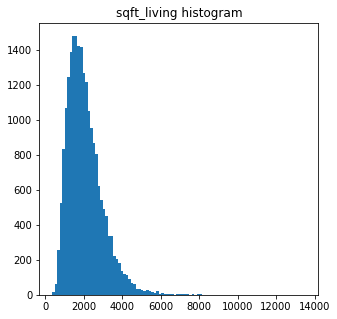

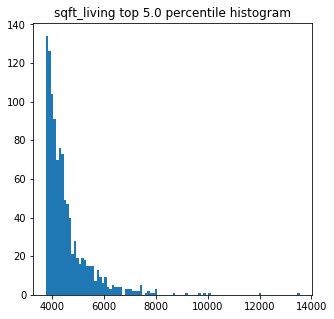

               id       date      price  bedrooms  bathrooms  sqft_living  \
12764  1225069038 2014-05-05  2280000.0         7       8.00        13540   
7245   6762700020 2014-10-13  7700000.0         6       8.00        12050   
3910   9808700762 2014-06-11  7060000.0         5       4.50        10040   
9245   9208900037 2014-09-19  6890000.0         6       7.75         9890   
8085   1924059029 2014-06-17  4670000.0         5       6.75         9640   
4407   2470100110 2014-08-04  5570000.0         5       5.75         9200   
14542  2303900035 2014-06-11  2890000.0         5       6.25         8670   
18288  6072800246 2014-07-02  3300000.0         5       6.25         8020   
1162   1247600105 2014-10-20  5110000.0         5       5.25         8010   
1446   8907500070 2015-04-13  5350000.0         5       5.00         8000   
13398  2426039123 2015-01-30  2420000.0         5       4.75         7880   
19842  2524069078 2015-01-22  2700000.0         4       4.00         7850   

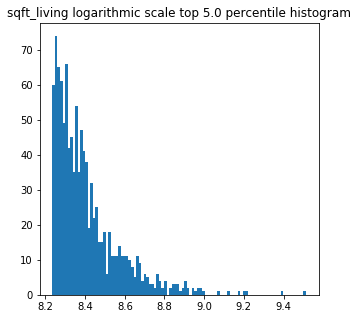

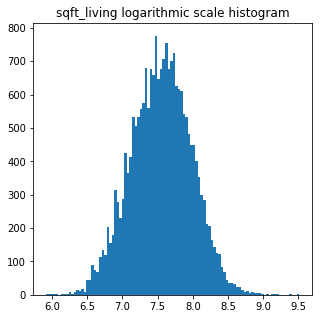

In [387]:
analyse_right_tail('sqft_living', 0.95)

Values are sensible, high values are in the believable scope, but we should use a logarithmic scale in the regression. 

### 'sqft_lot'

In [388]:
data['sqft_lot'].apply(lambda x: x/1000).describe()

count    21597.000000
mean        15.099409
std         41.412637
min          0.520000
25%          5.040000
50%          7.618000
75%         10.685000
max       1651.359000
Name: sqft_lot, dtype: float64

Once again, looks very skewed to the right, we are doing the same analysis as for the previous sqft variable.

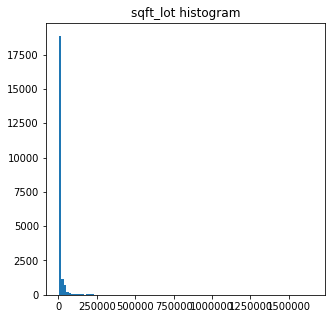

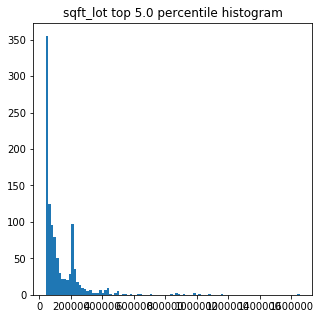

               id       date      price  bedrooms  bathrooms  sqft_living  \
1717   1020069017 2015-03-27   700000.0         4       1.00         1300   
17305  3326079016 2015-05-04   190000.0         2       1.00          710   
7640   2623069031 2014-05-21   542500.0         5       3.25         3010   
7762   2323089009 2015-01-19   855000.0         4       3.50         4030   
3945    722069232 2014-09-05   998000.0         4       3.25         3770   
4437   3626079040 2014-07-30   790000.0         2       3.00         2560   
6685   2624089007 2015-03-20  2000000.0         2       2.50         3900   
7070   2724079090 2015-01-05  1650000.0         4       3.25         3920   
20436  1125079111 2015-04-15  1600000.0         4       5.50         6530   
9705    225079036 2015-01-07   937500.0         4       4.00         5545   
4536   2522029039 2014-09-29   550000.0         3       2.00         3650   
12993   619079096 2015-04-06   750000.0         3       2.50         2350   

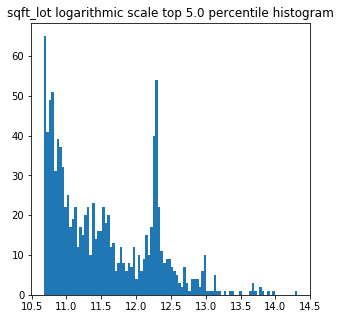

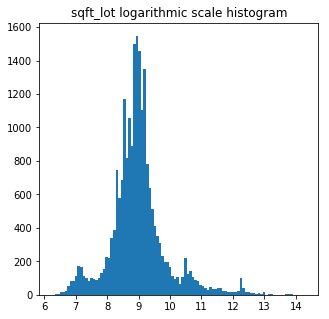

In [389]:
analyse_right_tail('sqft_lot', 0.95)

There are extremely high values here.Once again, I don't believe the data itself is wrong, searching for the properties with top lot sizes, overall it seems believable. However, there is something suspicious going on with this variable, the shape of the histogram is highly irregular with multiple peaks. 

If we opt to use this variable, I recommend cutting the top x% from the regression analysis. 

### 'sqft_above'

In [390]:
data['sqft_above'].describe()

count    21597.000000
mean      1788.596842
std        827.759761
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

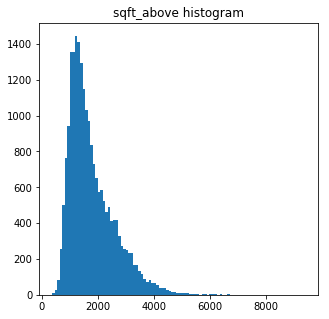

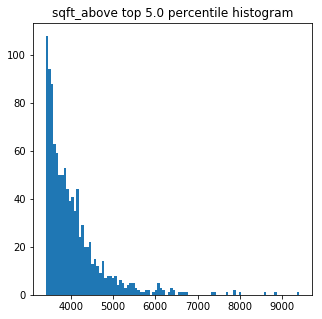

               id       date      price  bedrooms  bathrooms  sqft_living  \
12764  1225069038 2014-05-05  2280000.0         7       8.00        13540   
9245   9208900037 2014-09-19  6890000.0         6       7.75         9890   
7245   6762700020 2014-10-13  7700000.0         6       8.00        12050   
18288  6072800246 2014-07-02  3300000.0         5       6.25         8020   
13398  2426039123 2015-01-30  2420000.0         5       4.75         7880   
19842  2524069078 2015-01-22  2700000.0         4       4.00         7850   
3910   9808700762 2014-06-11  7060000.0         5       4.50        10040   
11859  8835800350 2015-01-12  1950000.0         4       3.25         7420   
18579  3023069166 2014-07-08  1140000.0         5       4.00         7320   
1446   8907500070 2015-04-13  5350000.0         5       5.00         8000   
16759  1630700380 2015-01-30  1920000.0         5       5.75         7730   
11093  4054530260 2014-06-27  1820000.0         4       4.50         6640   

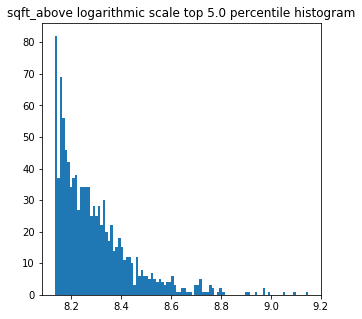

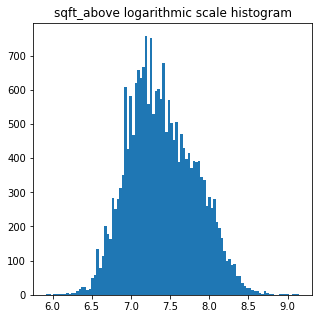

In [391]:
# the above looks good at a first glance, running usual analysis
analyse_right_tail('sqft_above', 0.95)

Similar treatment as with sqft_living, I believe the data is correct, use logarithmic scale. 

### 'sqft_basement'


TODO replace ? with 0, make everything float

In [392]:
data['sqft_basement'].describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [393]:
# There are non-numeric values in this column, a quick search through the data revealed that there are '?' values. 
data['sqft_basement'].value_counts(dropna=False).head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [394]:
type(data['sqft_basement'][0])

str

In [446]:
# they are strings and there are some '?' values
# first, replace '?' with 0
data['sqft_basement'].replace('?', 0, inplace = True)


In [448]:
data['sqft_basement'].value_counts().head()

0.0      12826
0          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [451]:
# next, we make them floats first then to integers
data['sqft_basement'] = data['sqft_basement'].apply(lambda x: float(x))
data['sqft_basement'] = data['sqft_basement'].apply(lambda x: int(x))

In [452]:
data['sqft_basement'].describe()

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

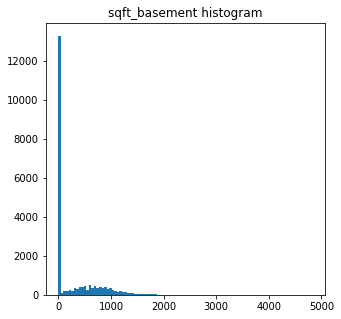

In [455]:
# log scale obviously won't work with basements, there are a lot of 0 values
# just checking the histogram now

plt.figure(figsize = (5,5))
plt.hist(x = data['sqft_basement'], bins = 100)
plt.title('sqft_basement histogram')
plt.show()

This does not look like something we should use in the data. 

### 'sqft_living15'

In [417]:
data['sqft_living15'].apply(lambda x: x/1000).describe()

count    21597.00000
mean         1.98662
std          0.68523
min          0.39900
25%          1.49000
50%          1.84000
75%          2.36000
max          6.21000
Name: sqft_living15, dtype: float64

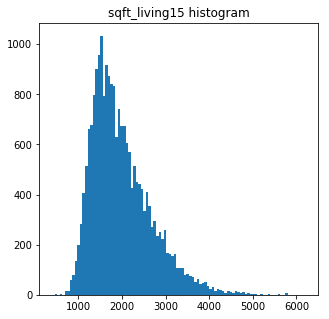

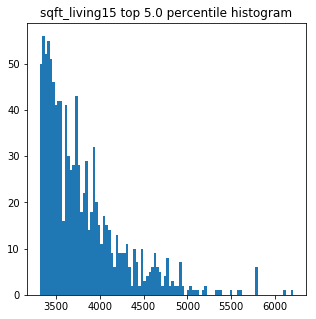

               id       date      price  bedrooms  bathrooms  sqft_living  \
19842  2524069078 2015-01-22  2700000.0         4       4.00         7850   
10362  3303850390 2014-12-12  2980000.0         5       5.50         7400   
21524   715010530 2015-01-13  1880000.0         5       3.50         4410   
20814   715010140 2014-10-02  1750000.0         5       3.25         5790   
20547   715010110 2014-08-04  1240000.0         5       3.25         5790   
16416   715010130 2015-02-02  1750000.0         6       4.25         5860   
5446   7237501190 2014-10-10  1780000.0         4       3.25         4890   
1122   7237501180 2014-06-25  1200000.0         4       1.75         3990   
11859  8835800350 2015-01-12  1950000.0         4       3.25         7420   
1528   4054510270 2014-08-27  1250000.0         4       3.75         3830   
12700   853200040 2015-04-28  2410000.0         5       2.50         4600   
2711   7851980260 2014-07-30  1110000.0         5       3.50         7350   

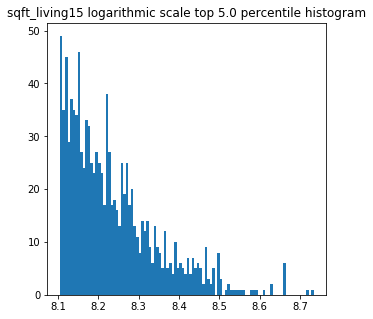

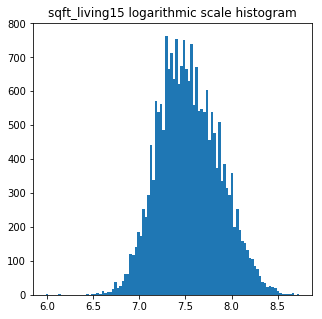

In [418]:
analyse_right_tail('sqft_living15', 0.95)

Same as other sqft, does not look wrong, use log scale in regression. 

### 'sqft_lot15'

In [420]:
data['sqft_lot15'].apply(lambda x: x/1000).describe()

count    21597.000000
mean        12.758284
std         27.274442
min          0.651000
25%          5.100000
50%          7.620000
75%         10.083000
max        871.200000
Name: sqft_lot15, dtype: float64

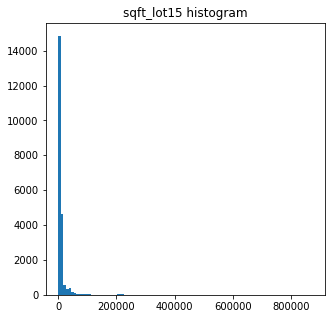

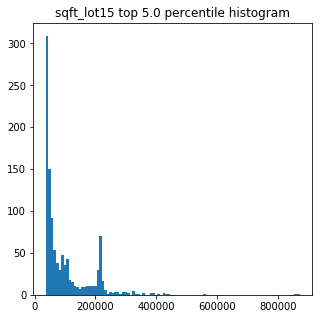

               id       date      price  bedrooms  bathrooms  sqft_living  \
9705    225079036 2015-01-07   937500.0         4       4.00         5545   
20436  1125079111 2015-04-15  1600000.0         4       5.50         6530   
13451  3420069060 2014-11-07   790000.0         3       2.50         2640   
8655   3226079059 2014-10-19   549950.0         3       1.75         2930   
3797   1550000463 2014-08-26   637000.0         4       3.50         3080   
1717   1020069017 2015-03-27   700000.0         4       1.00         1300   
19141  1020069042 2014-10-01   858000.0         4       3.50         4370   
6685   2624089007 2015-03-20  2000000.0         2       2.50         3900   
15606  2225079030 2014-12-12   180000.0         2       1.00          960   
21415  2725079018 2014-05-09   800000.0         4       3.25         3540   
17645   620079042 2015-03-23   370000.0         2       1.00         2360   
11171  1422029117 2014-07-11   319000.0         3       1.75         1640   

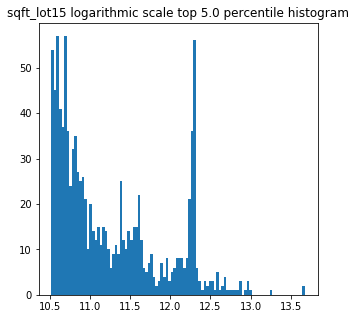

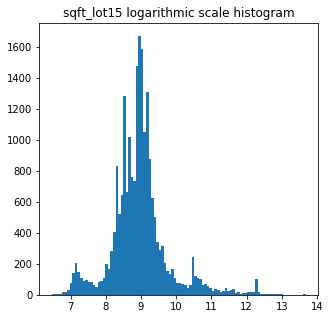

In [421]:
analyse_right_tail('sqft_lot15', 0.95)

Similar to sqft_lot, weird distribution. 

### 'bedrooms'

In [422]:
data['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [423]:
data['bedrooms'].value_counts(dropna = False)

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [424]:
data[data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,5,7,1040,580.0,1947,98103,47.6878,-122.331,1330,4700


In [430]:
# replacing it with 3, my guess is that it was supposed to be 3
data['bedrooms'].replace(33,3, inplace = True);

Replaced one extreme value with an educated guess. 

### 'bathrooms'

In [433]:
data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [436]:
data[data['bathrooms'] > 6].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.004522e+09,3.240000e+06,6.100000,7.025000,8687.000000,65470.50000,2.050000,2.100000,3.100000,11.500000,6619.000000,1982.500000,98082.900000,47.597020,-122.201000,3366.800000,47427.000000
std,3.471917e+09,2.478530e+06,1.286684,0.711512,2759.202985,92580.10301,0.497214,1.911951,0.316228,1.779513,1950.472592,31.496913,61.120009,0.073348,0.150625,1155.627852,64264.711056
min,4.240490e+08,4.500000e+05,5.000000,6.250000,4050.000000,6504.00000,1.000000,0.000000,3.000000,7.000000,4050.000000,1910.000000,98006.000000,47.464300,-122.372000,1448.000000,3866.000000
25%,1.399817e+09,1.445000e+06,5.000000,6.500000,7322.500000,15235.50000,2.000000,0.000000,3.000000,11.000000,4900.000000,1969.500000,98039.250000,47.559625,-122.317500,2735.000000,10978.000000
50%,2.413985e+09,2.585000e+06,6.000000,6.750000,8345.000000,29487.00000,2.000000,2.500000,3.000000,12.000000,6270.000000,1997.500000,98064.000000,47.593500,-122.225000,3605.000000,26079.500000
75%,6.590225e+09,4.327500e+06,6.750000,7.687500,9827.500000,58440.75000,2.000000,4.000000,3.000000,12.750000,8432.500000,2001.000000,98133.500000,47.630325,-122.076500,4155.000000,44350.000000
max,9.208900e+09,7.700000e+06,9.000000,8.000000,13540.000000,307752.00000,3.000000,4.000000,4.000000,13.000000,9410.000000,2010.000000,98177.000000,47.729500,-121.982000,4850.000000,217800.000000


'bathrooms' looks OK. 

### 'floors'

In [437]:
data['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

Once again, floors look believable.

### 'price'

In [456]:
data['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Really skewed to the right. Let's analyse right tail. 

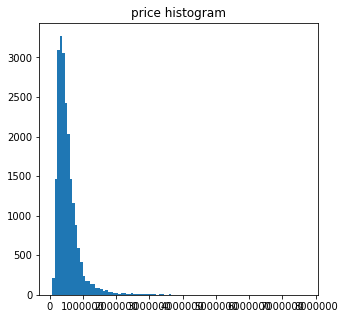

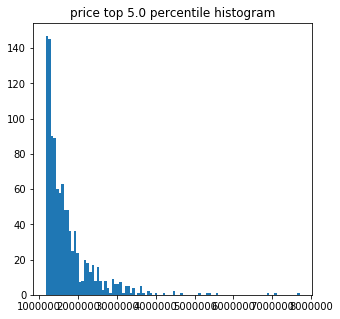

               id       date      price  bedrooms  bathrooms  sqft_living  \
7245   6762700020 2014-10-13  7700000.0         6       8.00        12050   
3910   9808700762 2014-06-11  7060000.0         5       4.50        10040   
9245   9208900037 2014-09-19  6890000.0         6       7.75         9890   
4407   2470100110 2014-08-04  5570000.0         5       5.75         9200   
1446   8907500070 2015-04-13  5350000.0         5       5.00         8000   
1313   7558700030 2015-04-13  5300000.0         6       6.00         7390   
1162   1247600105 2014-10-20  5110000.0         5       5.25         8010   
8085   1924059029 2014-06-17  4670000.0         5       6.75         9640   
2624   7738500731 2014-08-15  4500000.0         5       5.50         6640   
8629   3835500195 2014-06-18  4490000.0         4       3.00         6430   
12358  6065300370 2015-05-06  4210000.0         5       6.00         7440   
4145   6447300265 2014-10-14  4000000.0         4       5.50         7080   

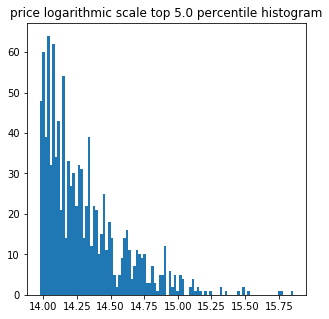

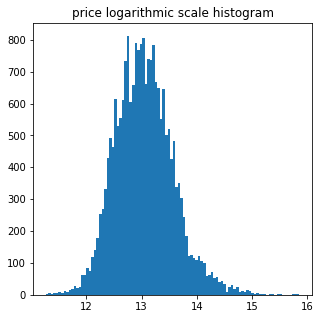

In [457]:
analyse_right_tail('price', 0.95)

I believe we should drop top x% from the regression analysis. 

In [479]:
for i in range(0,10):
    print(str((1-i/100) * 100) + '% percentile of price variable: ' + str(data['price'].quantile(1-i/100)))

100.0% percentile of price variable: 7700000.0
99.0% percentile of price variable: 1970000.0
98.0% percentile of price variable: 1600000.0
97.0% percentile of price variable: 1390000.0
96.0% percentile of price variable: 1260000.0
95.0% percentile of price variable: 1160000.0
94.0% percentile of price variable: 1060000.0
93.0% percentile of price variable: 997964.0000000002
92.0% percentile of price variable: 950000.0
91.0% percentile of price variable: 919993.6


We will drop the top 1% of prices. 

### Summary: 
  
id: 177 properties are in the database multiple times, 353 rows are impacted in total. I think we can leave these rows untouched in the data. 
  
date: re-coded to datetime, no additional edits
  
lat: no edits
  
long: no edits
  
zipcode: no edits
  
waterfront: column deleted
  
view: NaN's populated with the median of the column

condition: looks correct, but filter out condition 1's

grade: looks correct, but filter out grade 1 to 4's

yr_built: there are a couple 1900 values that could be erroneous, but we are making no edits

yr_renovated: same treatment as waterfront, deleted from the data

sqft_living: data is OK, in regression analysis, use logarithmic

sqft_lot: data is OK, in regression analysis, use logarithmic, and filter out the highest values, the data is extremely skewed even after log scale, distribution looks a bit suspicious, unexplained peaks in distribution.

sqft_above: same as sqft_living, data OK, use log scale

sqft_basement: looks like a bad variable to use in the regression

sqft_living15: same as living and above, OK, use log scale

sqft_lot15: same as sqft_lot

bedrooms: one extreme value, 33, replaced it with 3

bathrooms: OK

floors: OK

## Section 2 - Data Exploration

## Section 3 - Linear Regression

As a first step, we create a new filtered database, based on the conditions we outlined in Section 1. These rules are, once again: 

- condition > 1
- grade > 4
- price < perc(price, 99%)


In [480]:
data_filtered = data[(data['condition'] > 1) & (data['grade']> 4) & (data['price'] < data['price'].quantile(0.99))]

In [481]:
data_filtered.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.132400e+04,2.132400e+04,21324.000000,21324.000000,21324.000000,2.132400e+04,21324.000000,21324.000000,21324.000000,21324.000000,21324.000000,21324.000000,21324.000000,21324.000000,21324.000000,21324.000000,21324.000000,21324.000000
mean,4.586852e+09,5.189232e+05,3.365269,2.101247,2053.738135,1.497687e+04,1.491348,0.215250,3.412071,7.634168,1768.607344,279.226458,1971.084224,98078.084834,47.559557,-122.213740,1972.510598,12690.558010
std,2.877824e+09,2.846792e+05,0.894677,0.744574,859.935843,4.099624e+04,0.539125,0.727715,0.643516,1.124713,790.704878,428.029044,29.268104,53.474480,0.139087,0.141086,667.967095,27205.565097
min,1.000102e+06,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,2.000000,5.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124087e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.025750e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,98033.000000,47.469175,-122.329000,1480.000000,5100.000000
50%,3.904995e+09,4.500000e+05,3.000000,2.250000,1900.000000,7.575000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.570800,-122.230000,1830.000000,7600.000000
75%,7.326200e+09,6.350000e+05,4.000000,2.500000,2520.000000,1.053000e+04,2.000000,0.000000,4.000000,8.000000,2190.000000,530.000000,1997.000000,98118.000000,47.678500,-122.124000,2340.000000,10018.000000
max,9.900000e+09,1.960000e+06,11.000000,7.500000,7730.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,7420.000000,3260.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


In [482]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [483]:
data_filtered['price'].apply(lambda x: x/1000).describe()

count    21324.000000
mean       518.923190
std        284.679209
min         82.000000
25%        320.000000
50%        450.000000
75%        635.000000
max       1960.000000
Name: price, dtype: float64

Second step: we create log variables where we think it would make sense, and occasionally divide by 10^3 to make the results more readable. Creating log variables for price, sqft living, sqft above, sqft lot, sqft living15. 